In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the input image from disk, convert it to grayscale, and
# threshold it
image = cv.imread("/Users/miguelcamargorojas/Downloads/placa-edomex.webp")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
thresh = cv.threshold(gray, 0, 255,
	cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

In [3]:
def show_img(img, title=""):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.show()

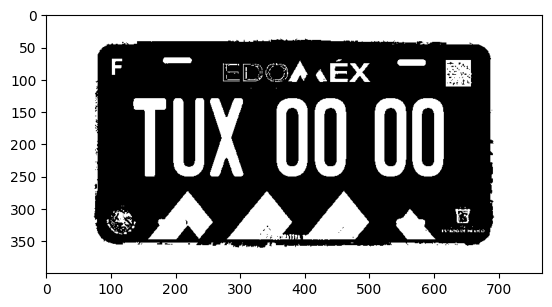

In [5]:
show_img(thresh)

In [6]:
output = cv.connectedComponentsWithStats(thresh)

In [7]:
type(output)

tuple

In [8]:
len(output)

4

In [9]:
(numLabels, labels, stats, centroids) = output

In [10]:
numLabels

135

In [13]:
centroids

array([[382.35282306, 192.43679441],
       [383.74303565, 200.22712996],
       [543.        ,  45.        ],
       [555.        ,  45.        ],
       [536.        ,  46.        ],
       [538.        ,  46.        ],
       [610.        ,  46.        ],
       [202.75384615,  71.04871795],
       [107.27853881,  78.84474886],
       [453.        ,  71.10526316],
       [565.69668246,  74.50236967],
       [638.16527197,  90.9707113 ],
       [390.68478261,  91.05217391],
       [280.03703704,  95.51851852],
       [284.86666667,  78.82222222],
       [297.6       ,  77.8       ],
       [312.48148148,  94.58024691],
       [320.        ,  77.        ],
       [324.        ,  77.        ],
       [344.5       ,  80.08333333],
       [351.6       ,  76.8       ],
       [357.        ,  77.25      ],
       [362.5       ,  77.        ],
       [450.68016194,  89.96558704],
       [485.21603563,  90.19821826],
       [319.5       ,  79.        ],
       [328.        ,  78.        ],
 

In [12]:
stats

array([[    74,     38,    620,    323, 146419],
       [     0,      0,    768,    400, 116845],
       [   543,     45,      1,      1,      1],
       [   555,     45,      1,      1,      1],
       [   536,     46,      1,      1,      1],
       [   538,     46,      1,      1,      1],
       [   610,     46,      1,      1,      1],
       [   181,     67,     45,     10,    390],
       [   102,     69,     16,     25,    219],
       [   449,     70,      9,      4,     19],
       [   544,     70,     44,     10,    422],
       [   619,     71,     40,     41,   1434],
       [   375,     72,     30,     33,    460],
       [   274,     76,     26,     28,     54],
       [   277,     77,     19,     11,     45],
       [   297,     77,      2,      3,      5],
       [   305,     77,     24,     27,     81],
       [   320,     77,      1,      1,      1],
       [   323,     77,      3,      1,      3],
       [   342,     77,      7,      8,     12],
       [   350,     

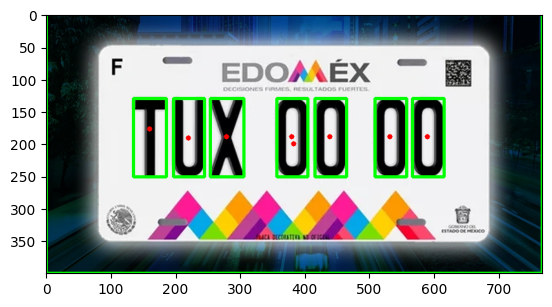

In [18]:
output = image.copy()
# loop over the number of unique connected component labels
for i in range(1, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	# if i == 0:
	# 	text = "examining component {}/{} (background)".format(
	# 		i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	# else:
	# 	text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	# print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv.CC_STAT_LEFT]
	y = stats[i, cv.CC_STAT_TOP]
	w = stats[i, cv.CC_STAT_WIDTH]
	h = stats[i, cv.CC_STAT_HEIGHT]
	area = stats[i, cv.CC_STAT_AREA]
	(cX, cY) = centroids[i]

	if h > 100:
		cv.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
		cv.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

plt.imshow(output[:, :, ::-1])
plt.show()